In [1]:
!git clone https://github.com/maryhc/opinion.git
#%cd /content
#!git pull

Cloning into 'opinion'...
remote: Enumerating objects: 84, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 84 (delta 1), reused 15 (delta 1), pack-reused 67
Unpacking objects: 100% (84/84), done.


In [2]:
#https://medium.com/datos-y-ciencia/preprocesamiento-de-datos-de-texto-un-tutorial-en-python-5db5620f1767
import re, string, unicodedata
import nltk
from nltk import FreqDist
nltk.download('punkt')
import matplotlib.pyplot as plt
import numpy as np

!pip install contractions
import contractions
import inflect
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
     |████████████████████████████████| 284 kB 10.2 MB/s 
     |████████████████████████████████| 106 kB 58.5 MB/s 


In [16]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

def replace_contractions(text):
    return contractions.fix(text)



In [ ]:
def limpieza(raw_file,mod_file):
  for x in raw_file:
	    xf = x.lower()
      mod_file.write(xf)

In [ ]:
from itertools import count
#file_name = open('/content/opinion/corpus/tweets.txt').read()
#file_name_mod = file_name.replace(".txt","")
file_positivos = "tweetp.txt"
file_negativos = "tweetn.txt"
file_neutros = "tweetnn.txt"
mod_file_p = open(file_positivos,"w")
mod_file_n = open(file_negativos,"w")
mod_file_nn = open(file_neutros,"w")

raw_file_p = open('/content/opinion/corpus/positivo_politica.txt').read()
raw_file_n = open('/content/opinion/corpus/negativo_politica.txt').read()
raw_file_nn = open('/content/opinion/corpus/neutro_politica.txt').read()




	 
limpieza(raw_file_p,mod_file_p)
limpieza(raw_file_n,mod_file_p)
limpieza(raw_file_nn,mod_file_p)	 

In [ ]:
pattern = r'''(?x)
              (?:[A-Z]\.)+
              | \w+(?:-\w+)*
              | \$?\d+(?:\.\d+)?%?
              | \.\.\.
              | [][.,;"'?():-_´]
'''              

In [ ]:
sample = open('/content/tweetsn.txt').read()
def remove_non_ascii(words):
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

sample = remove_non_ascii(sample)
#words = nltk.word_tokenize(sample)
words = remove_non_ascii(sample)



In [ ]:
vocabulario = sorted(set(words))
print(vocabulario[1000:1050])

['alcance', 'alcano', 'alcantarilla', 'alcantarillado', 'alcanza', 'alcanzaba', 'alcanzan', 'alcanzando', 'alcanzaotra', 'alcanzaria', 'alcanzaron', 'alegra', 'alegran', 'alegre', 'alegremente', 'alegria', 'alejado', 'alejados', 'alejandra', 'alejate', 'alejen', 'alejese', 'alemania', 'alentar', 'alentarlas', 'alento', 'alerta', 'ales', 'alevoso', 'alex', 'alexis', 'alfa', 'alferez', 'alfombra', 'alfonsin', 'alfonsina', 'alfonso', 'alfredo', 'algido', 'algo', 'algonadie', 'alguien', 'alguilar', 'alguito', 'algun', 'alguna', 'algunas', 'alguno', 'algunos', 'ali']


In [ ]:
#Riqueza lexica
rl = len(vocabulario)/len(words)
print(rl)

0.11060637839866648


In [ ]:
def porcentaje_palabra(palabra, texto):
    return 100*texto.count(palabra)/len(texto)

In [ ]:
porcentaje_palabra('golpista',words)

0.07672182542748959

In [ ]:
#Diccionario
dic = {}
for palabra in set(words):
  dic[palabra] = words.count(palabra)
dic  

{'': 15,
 'huele': 1,
 'riesgo': 9,
 'contado': 1,
 'buscate': 1,
 'proveedor': 2,
 'europeo': 2,
 'problemo': 1,
 'presidencia': 26,
 'bipolaridad': 1,
 'tacos': 1,
 'pajera': 1,
 'rasguen': 1,
 'acordar': 2,
 'dode': 1,
 'ascenso': 1,
 'jilakatas': 1,
 'bronce': 1,
 'extorsion': 1,
 'idm': 1,
 'sub': 1,
 'llunkerio': 2,
 'beni': 2,
 'revizar': 1,
 'permisible': 2,
 'ambisionado': 1,
 'lockcout': 1,
 'presidenciable': 3,
 'recurso': 1,
 'avionlo': 1,
 'ayudarnos': 1,
 'politicamente': 12,
 'samuel': 3,
 'ninanovia': 1,
 'ayudeme': 1,
 'estabamos': 1,
 'calorcitoganemos': 1,
 'sed': 3,
 'hundira': 1,
 'ayudando': 2,
 'nolo': 1,
 'juntan': 2,
 'aceptara': 2,
 'barbijo': 1,
 'pex': 1,
 'imcis': 1,
 'respete': 3,
 'contiene': 1,
 'pasadena': 1,
 'convirtiendote': 1,
 'gobernaciones': 1,
 'especulaciones': 5,
 'pretendiendo': 1,
 'reservado': 1,
 'hubiere': 1,
 'atrofio': 1,
 'favoor': 1,
 'comprada': 3,
 'bufon': 5,
 'marido': 2,
 'sr': 31,
 'ordas': 1,
 'lucrativo': 1,
 'pirotecnia': 1,


In [ ]:
#FreqDist
fdist = FreqDist(words)
long_words = [palabra for palabra in words if len(palabra)>5]
#vocabulario_filtrado = sorted(set(long_words))
palabras_interesantes = [(palabra, fdist[palabra]) for palabra in set(words) if len(palabra) > 5 and fdist[palabra]>10]
dtypes = [('Palabra','S10'),('Frecuencia',int)]
palabras_interesantes = np.array(palabras_interesantes, dtype = dtypes)
palabras_interesantes

In [ ]:
palabras_interesantes = np.sort(palabras_interesantes, order = 'Frecuencia')
palabras_interesantes

array([(b'andrade',  11), (b'aparato',  11), (b'apellido',  11),
       (b'apenas',  11), (b'armado',  11), (b'asuntos',  11),
       (b'aymara',  11), (b'bartolina',  11), (b'bartolinas',  11),
       (b'bastante',  11), (b'blanca',  11), (b'blancos',  11),
       (b'boludo',  11), (b'cancer',  11), (b'capitalism',  11),
       (b'capitulo',  11), (b'ciencia',  11), (b'cojudo',  11),
       (b'compatriot',  11), (b'conoce',  11), (b'conocer',  11),
       (b'conviene',  11), (b'correspond',  11), (b'crimen',  11),
       (b'cuentan',  11), (b'cuestion',  11), (b'cuidar',  11),
       (b'culpables',  11), (b'defenderse',  11), (b'dejando',  11),
       (b'democratic',  11), (b'despreciab',  11), (b'enganar',  11),
       (b'escriben',  11), (b'escribiend',  11), (b'esperando',  11),
       (b'esperanza',  11), (b'esposos',  11), (b'estimado',  11),
       (b'fiscal',  11), (b'fracaso',  11), (b'gobernante',  11),
       (b'gobierna',  11), (b'guerriller',  11), (b'habrian',  11),
     

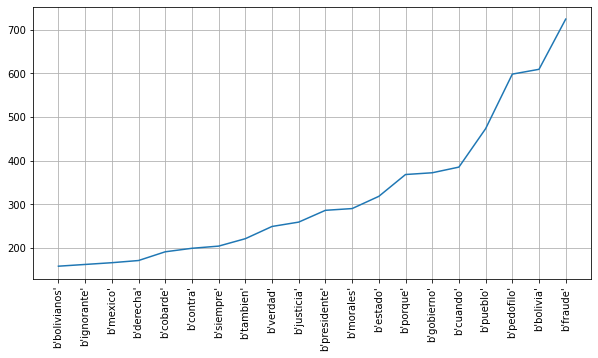

In [ ]:
top_words = 20
x = np.arange(len(palabras_interesantes[-top_words:]))
y = [freq[1] for freq in palabras_interesantes[-top_words:]]
plt.figure(figsize=(10,5))
plt.plot(x,y)
plt.xticks(x,[str(freq[0]) for freq in palabras_interesantes[-top_words:]], rotation = 'vertical')
plt.grid(True)
plt.show()

TypeError: ignored

TypeError: ignored

In [ ]:
def remove_non_ascii(words):
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    new_words = []
    for word in words:
        if word not in stopwords.words('spanish'):
            new_words.append(word)
    return new_words

def stem_words(words):
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = replace_numbers(words)
    #words = remove_stopwords(words)
    return words

In [ ]:
words = normalize(words)
print(len(words))

14926


In [ ]:
print(len(words))


14926


In [ ]:
flatten = [w for l in words for w in l]
print(len(flatten))

71078


In [ ]:
arr = [w for w in words if re.search('pedofilo',w)]
print(len(arr))

59
